<h1>Ungleichungen</h1>

In [1]:
solve(1/(x-1)<8,x)

[[x < 1], [x > (9/8)]]

Bereits relativ einfache Ungleichungen kann Sage nicht mehr sinnvoll lösen.

In [2]:
solve(cos(x)<1/2,x)

[[-2*cos(x) + 1 > 0]]

In [3]:
arccos(1/2)

1/3*pi

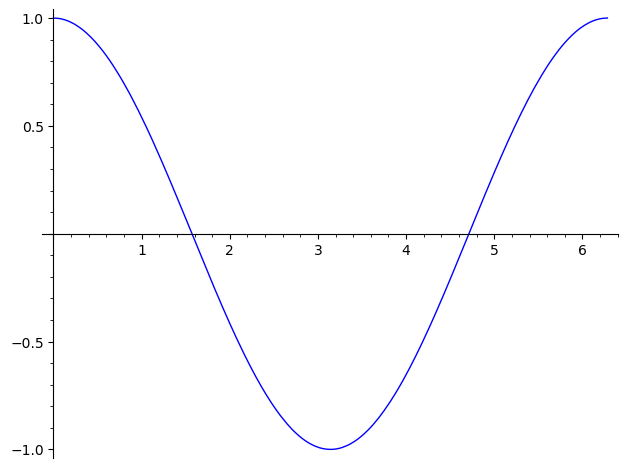

In [4]:
plot(cos(x),x,0,2*pi)

In [5]:
solve(cos(x)<1/2,x,to_poly_solve='force')

[[-2*cos(x) + 1 > 0]]

<h1>Polynome</h1>

Mit Polynomen können Computeralgebrasysteme gut exakt rechnen. Wenn man nur Polynome braucht, sollte man in Sage statt im SymbolicRing in Polynomringen rechnen.

In [6]:
QQ

Rational Field

Ring der Polynome über den rationalen Zahlen:

In [7]:
Px=QQ[x]
Px

Univariate Polynomial Ring in x over Rational Field

x bezeichnet immer noch die Variable im SymbolicRing

In [8]:
x

x

In [9]:
parent(x)

Symbolic Ring

Hier wird x nun als die Variable im Polynomring festgesetzt

In [10]:
x=Px(x)

In [11]:
parent(x)

Univariate Polynomial Ring in x over Rational Field

Andere Möglichkeit, x gleich direkt als Variable im Polynomring zu definieren:

In [12]:
Px.<x>=QQ[]

In [13]:
Px,parent(x)

(Univariate Polynomial Ring in x over Rational Field,
 Univariate Polynomial Ring in x over Rational Field)

Polynome werden immer automatisch ausmultipliziert

In [14]:
(x+5)^3

x^3 + 15*x^2 + 75*x + 125

In [15]:
p=x^2-3

Nullstellen mit .roots(). Ohne Argument werden nur Lösungen im Grundkörper, hier QQ, gesucht.

In [16]:
p.roots()

[]

Lösungen in anderen Ringen/Körpern: 

In [17]:
p.roots(RR)

[(-1.73205080756888, 1), (1.73205080756888, 1)]

In [18]:
p.roots(QQbar)

[(-1.732050807568878?, 1), (1.732050807568878?, 1)]

QQbar ist der Körper aller <b>algebraischen Zahlen</b>, also aller komplexen Zahlen, die Nullstellen von Polynomen über QQ sind. Mit diesen kann Sage <b>exakt</b> rechnen. Die Gleitkommadarstellungen oben dienen nur der Darstellung, intern wird exakt gerechnet.

Wir extrahieren die erste Nullstelle: der erste Wert des ersten Tupels im obigen Ergebnis

In [19]:
r1=_[0][0]

In [20]:
r1

-1.732050807568878?

In [21]:
parent(r1)

Algebraic Field

Beliebig genaue Auswertung

In [22]:
r1.n(digits=100)

-1.732050807568877293527446341505872366942805253810380628055806979451933016908800037081146186757248576

In [23]:
a=r1+1
a

-0.732050807568878?

Das Polynom, das die neue algebraische Zahl r1+1 als Nullstelle hat:  (intern wird in QQbar immer mit diesen Polynomen gerechnet, zusammen mit hinreichend genauen Approximationen um die Nullstelle eindeutig zu identifizieren.)

In [24]:
a.minpoly()

x^2 - 2*x - 2

## Anonyme Funktionen: Lambda-Funktionen (Python)

In [25]:
def f(x):  # "normale" (named) function
    return x^2

In [26]:
f

<function f at 0x7c32e8063600>

Python-Konzept, Schlüsselwort `lambda`. Notation ist stark an [Lambda-Kalkül](https://de.wikipedia.org/wiki/Lambda-Kalk%C3%BCl) angelehnt. Kein `return`-Statement erforderlich, dafür aber auch keine Assignments oder mehrzeilige Anweisungen erlaubt.

In [27]:
f_anon = lambda x: x^2
f_anon

<function <lambda> at 0x7c32e8063f60>

In [28]:
f(10)

100

In [29]:
f_anon(10) # praktische verwendung funktioniert gleich!

100

Anwendungsbeispiel für Lambda-Funktionen: Anpassung der Sortierfunktion (via `sorted`)

In [30]:
lst = [7, 5, 1234, 13, 9, 8, 5, 17, 42]

In [31]:
sorted(lst)  # aufsteigende Sortierung

[5, 5, 7, 8, 9, 13, 17, 42, 1234]

Wollen Zahlen wie in einem Telefonbuch ("lexikographisch") sortieren. Strategie: übergebe eine Funktion als `key` an die `sorted`-Funktion, die vor dem Sortieren auf die Elemente angewandt wird. Die Listenelemente werden dabei nicht verändert, es wird nur nach einem anderen "Schlüssel" sortiert.

In [32]:
sorted(lst, key=lambda elem: str(elem))  # Strings werden automatisch lexikographisch sortiert

[1234, 13, 17, 42, 5, 5, 7, 8, 9]

In diesem Beispiel wäre keine Lambda-Funktion nötig gewesen, man hätte auch str() direkt nehmen können.

In [33]:
lst

[7, 5, 1234, 13, 9, 8, 5, 17, 42]

In [34]:
sorted(lst,key=str)

[1234, 13, 17, 42, 5, 5, 7, 8, 9]

Beispiel mit komplizierterer Sortierfunktion:
Sortiere Zahlen von 2 bis 300 absteigend nach der Anzahl der vorkommenden Primfaktoren!

In [35]:
# srange ist Sage, faktorisieren auch -- rest würde in Python aber gleich funktionieren.
zahlen = srange(2, 300, include_endpoint=True)  # alternativ: srange(2, 1001).

Zuerst: herausfinden, wie wir für eine gegebene Zahl die Anzahl der Primfaktoren ermitteln können.

In [36]:
z = 84
list(z.factor())  # Liste von Tupeln (faktor, potenz)!

[(2, 2), (3, 1), (7, 1)]

In [37]:
# innere liste: "list comprehension", vlg. beschreibende Mengenschreibweise:
# [bla(x) for x in grundmenge]  <--->  {bla(x) | x ∈ grundmenge}
[alpha for (p, alpha) in z.factor()]

[2, 1, 1]

In [38]:
sum([alpha for (p, alpha) in z.factor()])

4

In [39]:
print(sorted(zahlen,key=lambda z: -sum([alpha for (p,alpha) in z.factor()])))

[256, 128, 192, 288, 64, 96, 144, 160, 216, 224, 240, 32, 48, 72, 80, 108, 112, 120, 162, 168, 176, 180, 200, 208, 243, 252, 264, 270, 272, 280, 300, 16, 24, 36, 40, 54, 56, 60, 81, 84, 88, 90, 100, 104, 126, 132, 135, 136, 140, 150, 152, 156, 184, 189, 196, 198, 204, 210, 220, 225, 228, 232, 234, 248, 250, 260, 276, 294, 296, 297, 8, 12, 18, 20, 27, 28, 30, 42, 44, 45, 50, 52, 63, 66, 68, 70, 75, 76, 78, 92, 98, 99, 102, 105, 110, 114, 116, 117, 124, 125, 130, 138, 147, 148, 153, 154, 164, 165, 170, 171, 172, 174, 175, 182, 186, 188, 190, 195, 207, 212, 222, 230, 231, 236, 238, 242, 244, 245, 246, 255, 258, 261, 266, 268, 273, 275, 279, 282, 284, 285, 286, 290, 292, 4, 6, 9, 10, 14, 15, 21, 22, 25, 26, 33, 34, 35, 38, 39, 46, 49, 51, 55, 57, 58, 62, 65, 69, 74, 77, 82, 85, 86, 87, 91, 93, 94, 95, 106, 111, 115, 118, 119, 121, 122, 123, 129, 133, 134, 141, 142, 143, 145, 146, 155, 158, 159, 161, 166, 169, 177, 178, 183, 185, 187, 194, 201, 202, 203, 205, 206, 209, 213, 214, 215, 217, 2

In [40]:
# Sortierschlüssel ist hier schon etwas grenzwertig mit lambda-Notation,
# leichter zu lesen wäre vermutlich eine "normale" Funktion.

print(
    sorted(zahlen, 
           key=lambda z: sum([alpha for (p, alpha) in z.factor()]), 
           reverse=True
          )
)

[256, 128, 192, 288, 64, 96, 144, 160, 216, 224, 240, 32, 48, 72, 80, 108, 112, 120, 162, 168, 176, 180, 200, 208, 243, 252, 264, 270, 272, 280, 300, 16, 24, 36, 40, 54, 56, 60, 81, 84, 88, 90, 100, 104, 126, 132, 135, 136, 140, 150, 152, 156, 184, 189, 196, 198, 204, 210, 220, 225, 228, 232, 234, 248, 250, 260, 276, 294, 296, 297, 8, 12, 18, 20, 27, 28, 30, 42, 44, 45, 50, 52, 63, 66, 68, 70, 75, 76, 78, 92, 98, 99, 102, 105, 110, 114, 116, 117, 124, 125, 130, 138, 147, 148, 153, 154, 164, 165, 170, 171, 172, 174, 175, 182, 186, 188, 190, 195, 207, 212, 222, 230, 231, 236, 238, 242, 244, 245, 246, 255, 258, 261, 266, 268, 273, 275, 279, 282, 284, 285, 286, 290, 292, 4, 6, 9, 10, 14, 15, 21, 22, 25, 26, 33, 34, 35, 38, 39, 46, 49, 51, 55, 57, 58, 62, 65, 69, 74, 77, 82, 85, 86, 87, 91, 93, 94, 95, 106, 111, 115, 118, 119, 121, 122, 123, 129, 133, 134, 141, 142, 143, 145, 146, 155, 158, 159, 161, 166, 169, 177, 178, 183, 185, 187, 194, 201, 202, 203, 205, 206, 209, 213, 214, 215, 217, 2

In [41]:
# bei komplizierteren Sortierschlüsseln ist eine "normale" Funktion ggf. lesbarer.

def anzahl_primfaktoren(z):
    factorization = z.factor()
    exponents = [alpha for (p, alpha) in factorization]
    return sum(exponents)

print(sorted(zahlen, key=anzahl_primfaktoren, reverse=True))

[256, 128, 192, 288, 64, 96, 144, 160, 216, 224, 240, 32, 48, 72, 80, 108, 112, 120, 162, 168, 176, 180, 200, 208, 243, 252, 264, 270, 272, 280, 300, 16, 24, 36, 40, 54, 56, 60, 81, 84, 88, 90, 100, 104, 126, 132, 135, 136, 140, 150, 152, 156, 184, 189, 196, 198, 204, 210, 220, 225, 228, 232, 234, 248, 250, 260, 276, 294, 296, 297, 8, 12, 18, 20, 27, 28, 30, 42, 44, 45, 50, 52, 63, 66, 68, 70, 75, 76, 78, 92, 98, 99, 102, 105, 110, 114, 116, 117, 124, 125, 130, 138, 147, 148, 153, 154, 164, 165, 170, 171, 172, 174, 175, 182, 186, 188, 190, 195, 207, 212, 222, 230, 231, 236, 238, 242, 244, 245, 246, 255, 258, 261, 266, 268, 273, 275, 279, 282, 284, 285, 286, 290, 292, 4, 6, 9, 10, 14, 15, 21, 22, 25, 26, 33, 34, 35, 38, 39, 46, 49, 51, 55, 57, 58, 62, 65, 69, 74, 77, 82, 85, 86, 87, 91, 93, 94, 95, 106, 111, 115, 118, 119, 121, 122, 123, 129, 133, 134, 141, 142, 143, 145, 146, 155, 158, 159, 161, 166, 169, 177, 178, 183, 185, 187, 194, 201, 202, 203, 205, 206, 209, 213, 214, 215, 217, 2

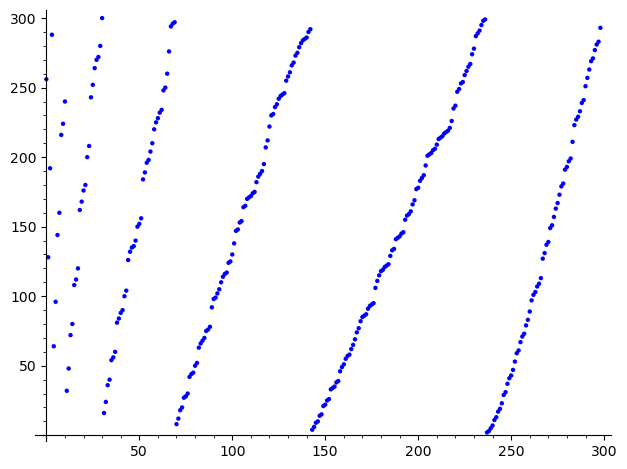

In [42]:
list_plot(sorted(zahlen, key=anzahl_primfaktoren, reverse=True))  # muster durch stabile Sortierung erklärbar; viele Zahlen haben gleiche Anzahl von Primfaktoren.

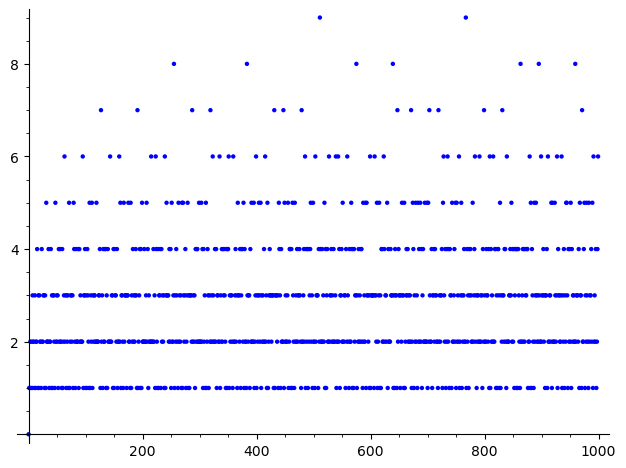

In [43]:
list_plot([anzahl_primfaktoren(x) for x in [1..1000]])

Lambda-Funktionen können auch mehrere (oder keine) Input-Argumente haben.

In [44]:
no_args = lambda: print("hello, world!")
no_args

<function <lambda> at 0x7c32dff1af20>

In [45]:
no_args()

hello, world!


In [46]:
add = lambda x, y: x + y

In [47]:
add(10, 32)

42

Wir können eine neue Funktion bilden, in der eines der Argumente "gebunden" (=eingesetzt) wird -- ["Currying"](https://de.wikipedia.org/wiki/Currying). Wichtig, weil Lambda-Kalkül *eigentlich* keine mehrargumentigen Ausdrücke vorsieht. Hier ein Beispiel, bei dem eine Funktion zurückgegeben wird, die 10 addiert:

In [48]:
add10 = lambda y: add(10, y)

In [49]:
add10(32)

42

Mehrargumentige Funktionen können auch direkt als "Curry" geschrieben werden:

In [50]:
add_y = lambda y: lambda x: x + y

In [51]:
add_y(32)  # y = 32 einsetzen liefert eine Funktion x |--> x + 32 zurück!

<function <lambda>.<locals>.<lambda> at 0x7c32dff19440>

In [52]:
add_y(32)(10)  # 32 ist y, 10 ist x

42

<h1>Mehr über Listen und funktionale Programmierung: zip</h1>

Zwei Listen können im Reißverschlussprinzip miteinander "verbunden" werden, um eine Liste (eigentlich: ein Generator) von Tupeln zu erzeugen.

In [53]:
lst_1 = [1, 2, 3]
lst_2 = ['x', 'y', 'z']

In [54]:
zip(lst_1, lst_2)

In [55]:
list(zip(lst_1, lst_2))

[(1, 'x'), (2, 'y'), (3, 'z')]

In [56]:
for zahl, buchstabe in zip(lst_1, lst_2):
    print(buchstabe * zahl)

x
yy
zzz


In [57]:
# bei ungleicher Länge wird nur soweit wie möglich "gezippt", der Rest verworfen!
list(zip(range(10), range(42)))

[(0, 0),
 (1, 1),
 (2, 2),
 (3, 3),
 (4, 4),
 (5, 5),
 (6, 6),
 (7, 7),
 (8, 8),
 (9, 9)]

Anwendungsbeispiel: symbolische Summe $\sum_{j=0}^{10} a_j x^j$ konstruieren.

In [58]:
var('x')

x

Brauchen Koeffizienten $a_j$ als symbolische Variablen, wollen nicht händisch anlegen. Dazu: kurzer Ausflug zu f-Strings (f ... format).

In [59]:
# Stringformatierung mit f-Strings (Python!): 
"das ist ein normaler string"  # -> das ist ein normaler strnig
f"ich bin ein f-string"  # -> das ist ein f-string

print(f"Die Faktorisierung von 42 ist {factor(42)}.")
print("Die Faktorisierung von 42 ist " + str(factor(42)) + ".")  # natürlich auch möglich, aber weniger elegant. 

Die Faktorisierung von 42 ist 2 * 3 * 7.
Die Faktorisierung von 42 ist 2 * 3 * 7.


In [60]:
var_names = [f"a{ind}" for ind in srange(11)]
var_names

['a0', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9', 'a10']

In [61]:
aa = [var(var_name) for var_name in var_names]
aa

[a0, a1, a2, a3, a4, a5, a6, a7, a8, a9, a10]

In [62]:
parent(a0)

Symbolic Ring

In [63]:
sum([coef*x^power for (coef, power) in zip(aa, srange(len(aa)))])

a10*x^10 + a9*x^9 + a8*x^8 + a7*x^7 + a6*x^6 + a5*x^5 + a4*x^4 + a3*x^3 + a2*x^2 + a1*x + a0

Es wäre auch etwas direkter gegangen, wenn man mehr Sage-Features verwendet:

In [64]:
SR.var?

Signature:      SR.var(self, name, latex_name=None, n=None, domain=None)
Docstring:     
   Return a symbolic variable as an element of the symbolic ring.

   INPUT:

   * "name" -- string or list of strings with the name(s) of the
     symbolic variable(s)

   * "latex_name" -- (optional) string used when printing in latex
     mode, if not specified use "'name'"

   * "n" -- (optional) positive integer; number of symbolic variables,
     indexed from 0 to n-1

   * "domain" -- (optional) specify the domain of the variable(s); it
     is None by default, and possible options are (non-exhaustive
     list, see note below): "'real'", "'complex'", "'positive'",
     "'integer'" and "'noninteger'"

   OUTPUT: symbolic expression or tuple of symbolic expressions

   See also:

     This function does not inject the variable(s) into the global
     namespace. For that purpose see "var()".

   Note:

     For a comprehensive list of acceptable features type
     "'maxima('features')'", and s

In [65]:
SR.var('a', 11)  # Sage!

(a0, a1, a2, a3, a4, a5, a6, a7, a8, a9, a10)

In [66]:
list(enumerate(['x', 'y', 'z']))  # enumerate ist wie zip, wenn mit laufenden indizes "gezippt" werden soll.

[(0, 'x'), (1, 'y'), (2, 'z')]

In [67]:
# beide abkürzungen zusammen erlauben einen (lesbaren :-)) einzeiler:

sum(coef * x^power for (power, coef) in enumerate(SR.var('a', 11)))

a10*x^10 + a9*x^9 + a8*x^8 + a7*x^7 + a6*x^6 + a5*x^5 + a4*x^4 + a3*x^3 + a2*x^2 + a1*x + a0

In [68]:
P1=sum(coef * x^power for (power, coef) in enumerate(SR.var('a', 4)))
P2=sum(coef * x^power for (power, coef) in enumerate(SR.var('b', 4)))

In [69]:
P1, P2

(a3*x^3 + a2*x^2 + a1*x + a0, b3*x^3 + b2*x^2 + b1*x + b0)

In [70]:
P12=(P1*P2).expand()
P12

a3*b3*x^6 + a3*b2*x^5 + a2*b3*x^5 + a3*b1*x^4 + a2*b2*x^4 + a1*b3*x^4 + a3*b0*x^3 + a2*b1*x^3 + a1*b2*x^3 + a0*b3*x^3 + a2*b0*x^2 + a1*b1*x^2 + a0*b2*x^2 + a1*b0*x + a0*b1*x + a0*b0

In [71]:
P12.collect(x)

a3*b3*x^6 + (a3*b2 + a2*b3)*x^5 + (a3*b1 + a2*b2 + a1*b3)*x^4 + (a3*b0 + a2*b1 + a1*b2 + a0*b3)*x^3 + (a2*b0 + a1*b1 + a0*b2)*x^2 + a0*b0 + (a1*b0 + a0*b1)*x

In [72]:
P12.coefficient(x^2)

a2*b0 + a1*b1 + a0*b2

In [73]:
P12.coefficient(a3)

b3*x^6 + b2*x^5 + b1*x^4 + b0*x^3

## Symbolische Funktionen

Bis jetzt: Funktionen immer über `def`.

In [74]:
def f(x):
    return x*sin(x)

In [75]:
diff(f, x)  # wir haben keinen symbolischen Ausdruck für f!

TypeError: unable to convert <function f at 0x7c32dfe5d440> to a symbolic expression

In [76]:
diff(f(x), x)  # nur "f" ist Python-Funktion, mit Einsetzung von x erhalten wir einen diff'baren symbolischen Ausdruck.

x*cos(x) + sin(x)

In [77]:
f(x)

x*sin(x)

In [78]:
# Wenn das wieder eine (einsetzbare) Funktion werden soll, muss man etwas aufpassen; die offensichtliche Variante ...
def f_diff(x):
    return diff(f(x), x)

In [79]:
f_diff(42)  # ... ist falsch. 
# es wird erst eingesetzt, dann abgeleitet:
# diff(f(x), x) -> diff(f(42), 42) -> f(42) wird 42-mal abgeleitet... -> 0.

0

In [80]:
def f_diff_fixed(x):
    u = SR.var('u')  # Weg über eine Hilfsvariable ist nötig.
    return diff(f(u), u)(u=x)  # ... und am ende muss für u wieder x eingesetzt werden.

f_diff_fixed(42)

42*cos(42) + sin(42)

In [81]:
var('u')
f(u)(u=10)

10*sin(10)

In [82]:
(x^2+1)(x=1)

2

Wir erstellen eine "echte" symbolische Funktion:

In [83]:
f(x) = x*sin(x)  # keine gültige Zuweisung in Python, in Sage schon* (* ... nicht wirklich, aber es schaut so aus.)

In [84]:
preparse('f(x) = x*sin(x)')  # (das ist, was eigentlich passiert.)

'__tmp__=var("x"); f = symbolic_expression(x*sin(x)).function(x)'

In [85]:
f

x |--> x*sin(x)

In [86]:
diff(f, x)

x |--> x*cos(x) + sin(x)

In [87]:
diff(f)

x |--> x*cos(x) + sin(x)

In [88]:
f(42)

42*sin(42)

Achtung: die bei der Erstellung von f(x) gewählte Variable ist weiter an die Funktion gebunden!

In [89]:
parent(f)  # Ring von aufrufbaren Funktionen **im Argument x**

Callable function ring with argument x

In [90]:
var('y')

y

In [91]:
diff(f, y)  # Funktion hängt nicht von y ab, ist bzgl. y also konstant. Ableitung also 0.

x |--> 0

In [92]:
diff(f(y),y)

y*cos(y) + sin(y)

In [93]:
fy=f(y)
fy

y*sin(y)

In [94]:
fy.function(y)

y |--> y*sin(y)

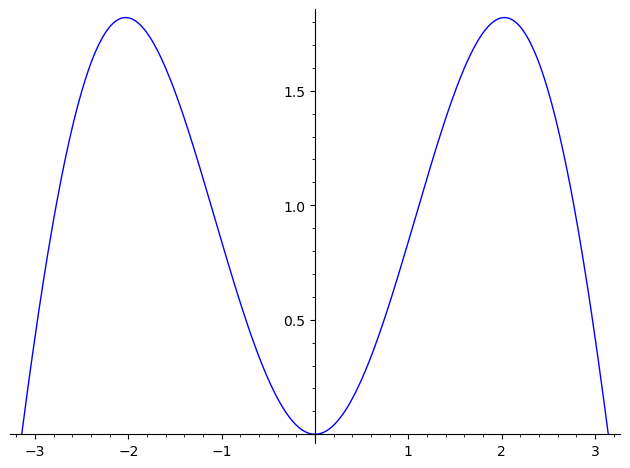

In [95]:
plot(f, -pi, pi)

In [96]:
g(x) = cos(x)

Addition von verschiedenen symbolischen Funktionen ist möglich.

In [97]:
f + g

x |--> x*sin(x) + cos(x)

Das Ergebnis der Summe ist aber evtl. überraschend, wenn die Funktionen an verschiedene Variablen gebunden sind.

In [98]:
h(y) = tan(y)

In [99]:
f + h  # Argumente werden beim Summieren nicht "vereinheitlicht".

(x, y) |--> x*sin(x) + tan(y)

In [100]:
parent(f + h)

Callable function ring with arguments (x, y)

Wir erhalten eine Funktion in mehreren Variablen!

Solche können wir aber auch direkt definieren:

In [101]:
h(x, y) = x^2 + y^2

In [102]:
h

(x, y) |--> x^2 + y^2

In [103]:
plot3d(h, (x, -1, 1), (y, -1, 1))

Graphics3d Object

In [104]:
v=(x+y).function(x,y)
v, parent(v)

((x, y) |--> x + y, Callable function ring with arguments (x, y))

## Symbolisches Rechnen: `assume` und `forget`

In [105]:
var('x, n')

(x, n)

In [106]:
integrate(x^n, x)  # Sage (und hier konkret das Untersystem Maxima) kann das nicht einfach so beantworten ...

ValueError: Computation failed since Maxima requested additional constraints; using the 'assume' command before evaluation *may* help (example of legal syntax is 'assume(n>0)', see `assume?` for more details)
Is n equal to -1?

... weil je nach Wert von $n$ entweder $\frac{x^{n+1}}{n+1}$, oder für $n = -1$ die Funktion $\log(x)$ richtig wäre.

Anstatt ein (möglicherweise falsches) Ergebnis zurückzuliefern (👀 [WolframAlpha](https://www.wolframalpha.com/input?i=integrate+x%5En+dx)), möchte Maxima wissen, ob wir etwas über $n$ sagen können (insb.: ist $n = -1$?).


Wir können entsprechende Annahmen in Sage treffen.

In [107]:
assume(n != -1)

In [108]:
integrate(x^n, x)

x^(n + 1)/(n + 1)

In [109]:
forget()  # alle bisherigen Annahmen wieder vergessen

In [110]:
assumptions()  # zeige alle aktuellen Annahmen

[]

In [111]:
assume(n == -1)

In [112]:
integrate(x^n, x)

log(x)

In [113]:
assumptions()

[n == -1]

In [114]:
sin(n*pi)  # Interessanterweise wird die Gleichheit zu einer ganzen Zahl hier nicht ausgenutzt, das Ergebnis könnte eigentlich 0 sein.

sin(pi*n)

Nicht nur Gleichheit und Ungleichheit können angenommen werden, sondern auch Ungleichungen und Zugehörigkeit zu gewissen Zahlenmengen. Verfügbare "assumption features":

In [115]:
bool(sin(n*pi)==0)

True

In [116]:
print(maxima('features'))

[integer, noninteger, even, odd, rational, irrational, real, imaginary, 
complex, analytic, increasing, decreasing, oddfun, evenfun, posfun, constant, 
commutative, lassociative, rassociative, symmetric, antisymmetric, 
integervalued]


In [117]:
forget()

In [118]:
assume(n, 'integer')  # Sei n eine ganze Zahl ...

In [119]:
sin(n*pi)  # ... dann ist sin(n*pi) = 0.

0

In [120]:
assume(n, 'noninteger')  # Widersprüchliche Annahmen können nicht getroffen werden. Wenn der Widerspruch erkannt wird ...

ValueError: Assumption is inconsistent

In [121]:
forget()

In [122]:
assume(n, 'noninteger')

In [123]:
sin(n*pi)

sin(pi*n)

(Bereichs-)annahmen sind beim Lösen von Gleichungen gelegentlich nützlich:

In [124]:
solve(x^3 - 8 == 0, x)

[x == I*sqrt(3) - 1, x == -I*sqrt(3) - 1, x == 2]

In [125]:
assume(x, 'real')

In [126]:
solve(x^3 - 8 == 0, x)

[x == 2]

In [127]:
forget()

Vorsicht: Komplexe Zahlen in Sage sind (aus technischer Notwendigkeit heraus) vergleichbar.

In [128]:
1 + I > 0

True

In [129]:
1 - I > 0

True

In [130]:
-1 + I > 0 

False

In [131]:
-1 - I > 0

False

In [132]:
assume(x > 0)

Für Sage wären die komplexen Zahlen zwar (lexikographisch nach Real- und Imaginärteil) vergleichbar, Maxima sieht in der Bedingung $x > 0$ aber keine Bereichseinschränkung, will die Ungleichung offenbar aber trotzdem nicht auf die gefundenen komplexen Lösungen anwenden...

In [133]:
solve(x^3 - 8 == 0, x)  # es wird nicht "konsistent" lexikographisch gefiltert ...

[x == I*sqrt(3) - 1, x == -I*sqrt(3) - 1, x == 2]

In [134]:
# ... man könnte aber noch "nachfiltern". "sol.rhs()" ist die rechte seite einer symbolischen relation.
[sol for sol in solve(x^3 - 8 == 0, x) if sol.rhs() > 0]

[x == 2]